In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
from scipy.optimize import curve_fit

In [2]:
def xg(theta, t, n):
    return t / np.cos(np.arcsin(np.sin(theta)/n))

def xa(theta, t, n):
    return t * np.cos(theta - np.arcsin(np.sin(theta)/n)) / np.cos(np.arcsin(np.sin(theta)/n))

def linear_func(x, a, b):
    return a * x + b

def polynomial_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

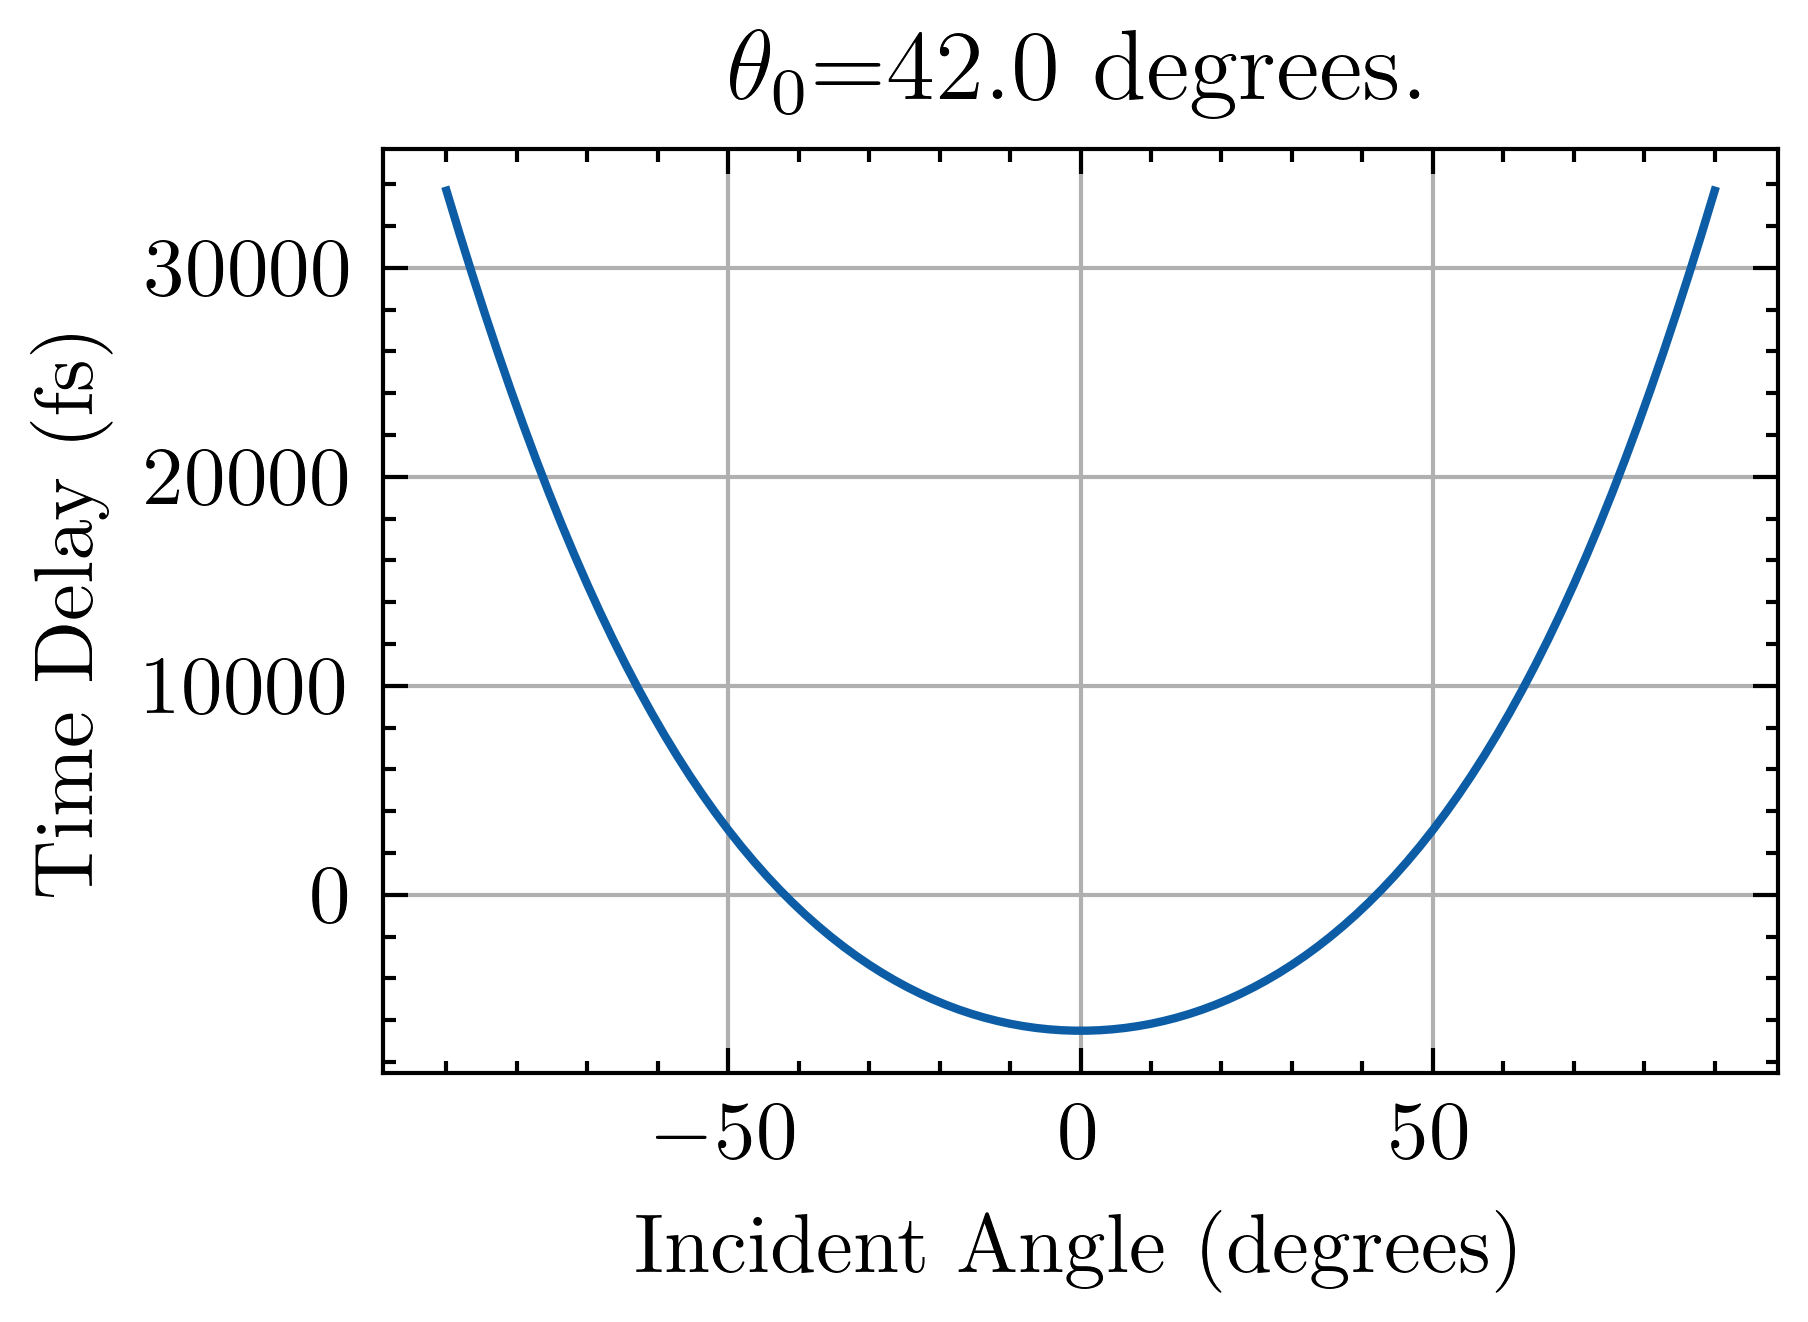

In [11]:
t = 9.7e-3  # thickness in meters
c = 3e8   # speed of light in m/s
n = 1.5104   # refractive index
theta_0 = np.radians(42)  # incident angle in radians
theta = np.linspace(-np.pi/2, np.pi/2, 100)
delta_t = 2 * (xa(theta_0, t, n) - xa(theta, t, n) + n * (xg(theta, t, n) - xg(theta_0, t, n))) / c  # time delay in seconds

plt.figure(figsize=(3, 2), dpi=600)
plt.plot(theta * 180 / np.pi, delta_t * 1e15)  # convert to femtoseconds
plt.xlabel('Incident Angle (degrees)')
plt.ylabel('Time Delay (fs)')
plt.title(r'$\theta_0$' + f'={np.degrees(theta_0)} degrees.')
plt.grid(True)
plt.show()

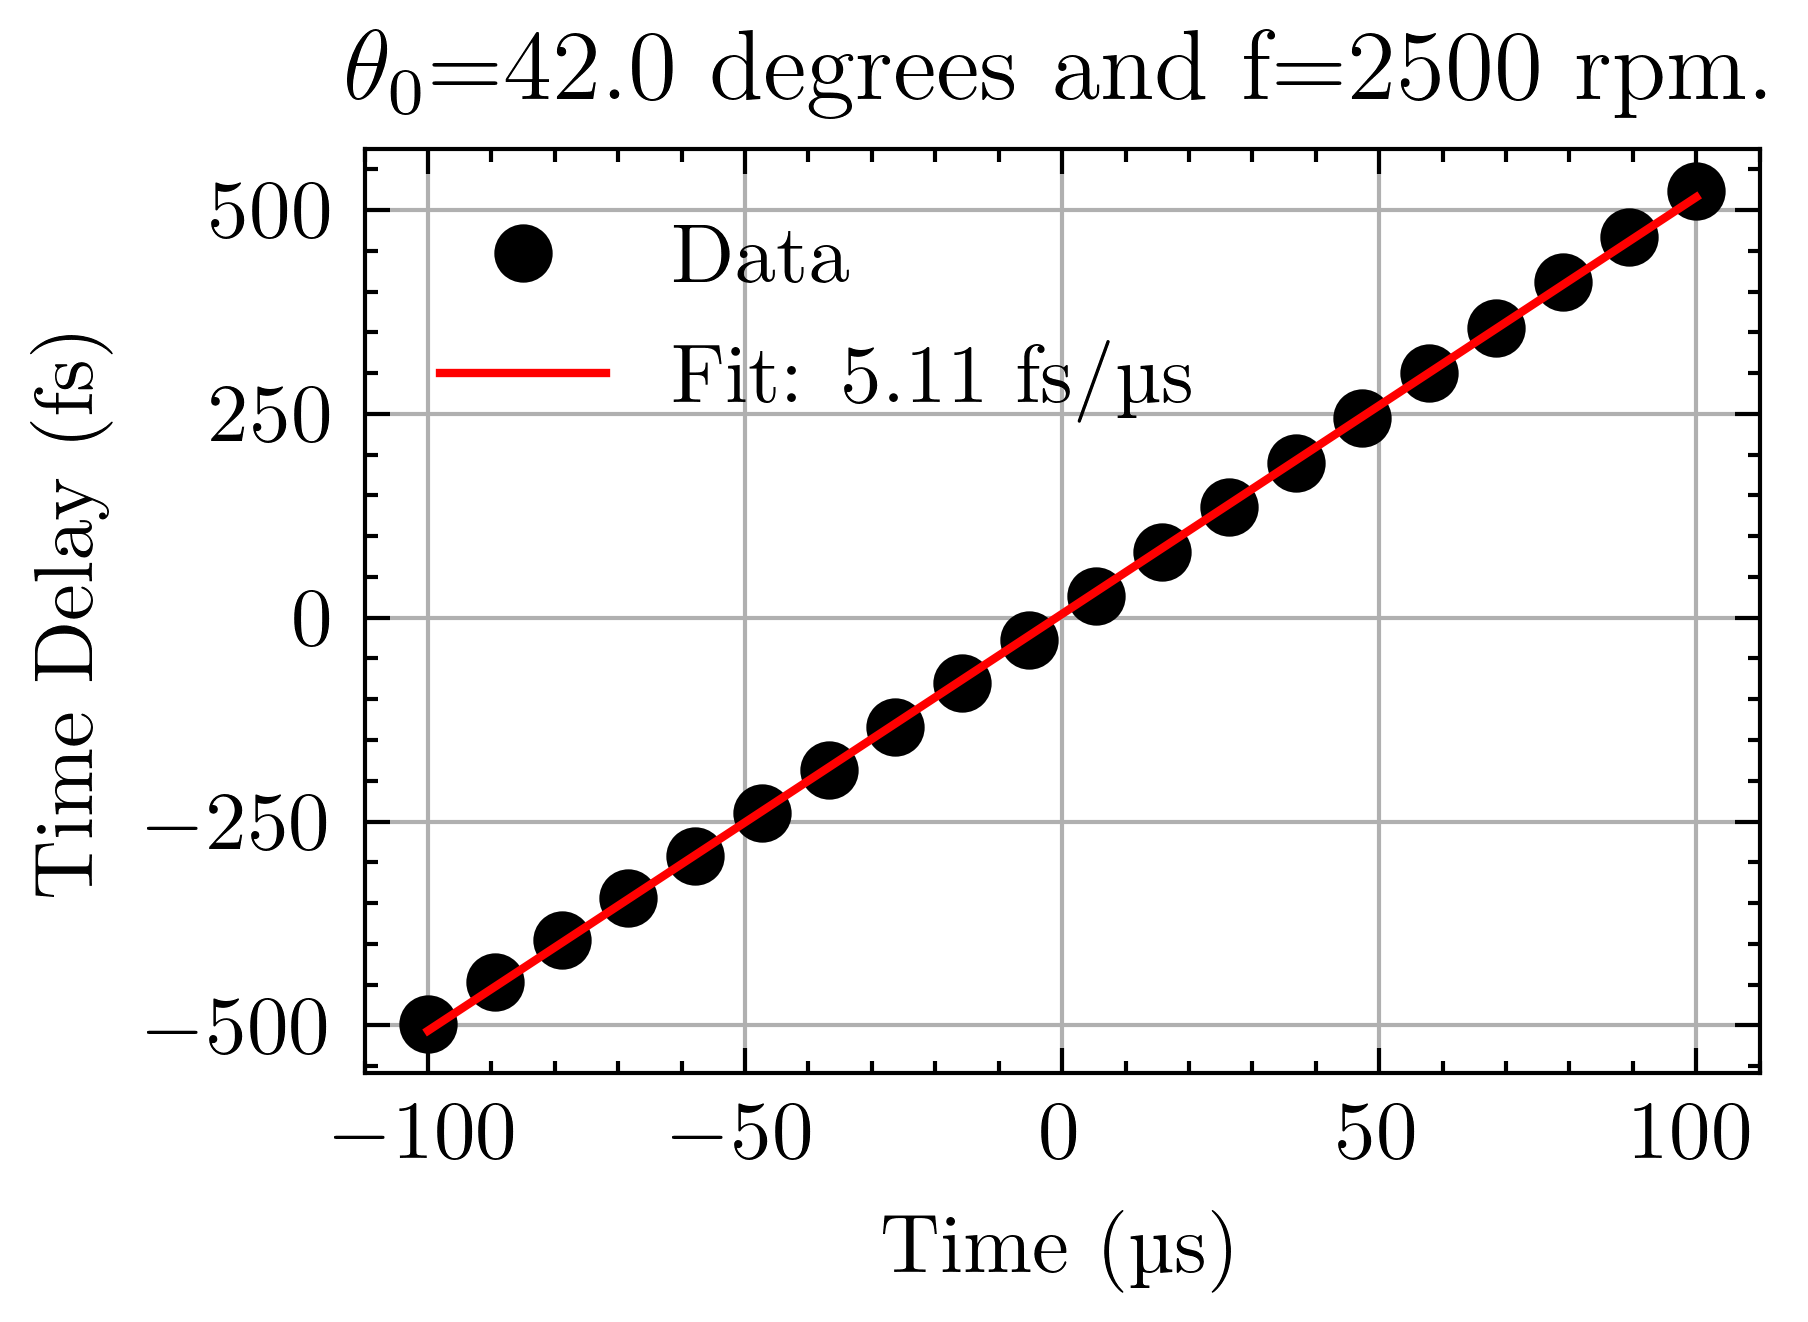

In [12]:
f = 2500/60 # frequency in Hz
t_act = np.linspace(-100, 100, 20) * 1e-6  # time in seconds
theta = theta_0 + 2 * np.pi * f * t_act  # phase shift in radians
delta_t = 2 * (xa(theta_0, t, n) - xa(theta, t, n) + n * (xg(theta, t, n) - xg(theta_0, t, n))) / c  # time delay in seconds

#linear fit
popt, pcov = curve_fit(linear_func, t_act, delta_t)
delta_t_fit = linear_func(t_act, *popt)

plt.figure(figsize=(3, 2), dpi=600)
plt.plot(t_act * 1e6, delta_t * 1e15, 'ko', label = 'Data')  # convert to microseconds and femtoseconds
plt.plot(t_act * 1e6, delta_t_fit * 1e15, 'r-', label = f'Fit: {1e15/1e6*popt[0]:.2f} fs/µs')  # fitted line
plt.xlabel('Time (µs)')
plt.ylabel('Time Delay (fs)')
plt.title(r'$\theta_0$' + f'={np.degrees(theta_0):.1f} degrees and f={f*60:.0f} rpm.')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
print(f'Conversion factor: {1e15/1e6*popt[0]/1.414:.2f} +/- {1e15/1e6*np.sqrt(np.diag(pcov))[0]/1.414:.2f} fs/µs (Gaussian pulse)')

Conversion factor: 3.60 +/- 0.01 fs/µs (Gaussian pulse)


In [6]:
theta_0_arr = np.linspace(0, np.pi/2, 20)  # incident angle in radians
conv_fact_arr = []
for theta_0 in theta_0_arr:    
    theta = theta_0 + 2 * np.pi * f * t_act  # phase shift in radians
    delta_t = 2 * (xa(theta_0, t, n) - xa(theta, t, n) + n * (xg(theta, t, n) - xg(theta_0, t, n))) / c  # time delay in seconds
    #linear fit
    popt, pcov = curve_fit(linear_func, t_act, delta_t)
    conv_fact_arr.append(1e15/1e6*popt[0])  # convert to fs/µs

C:\Users\dinus\AppData\Local\Temp\ipykernel_24548\260888915.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(linear_func, t_act, delta_t)


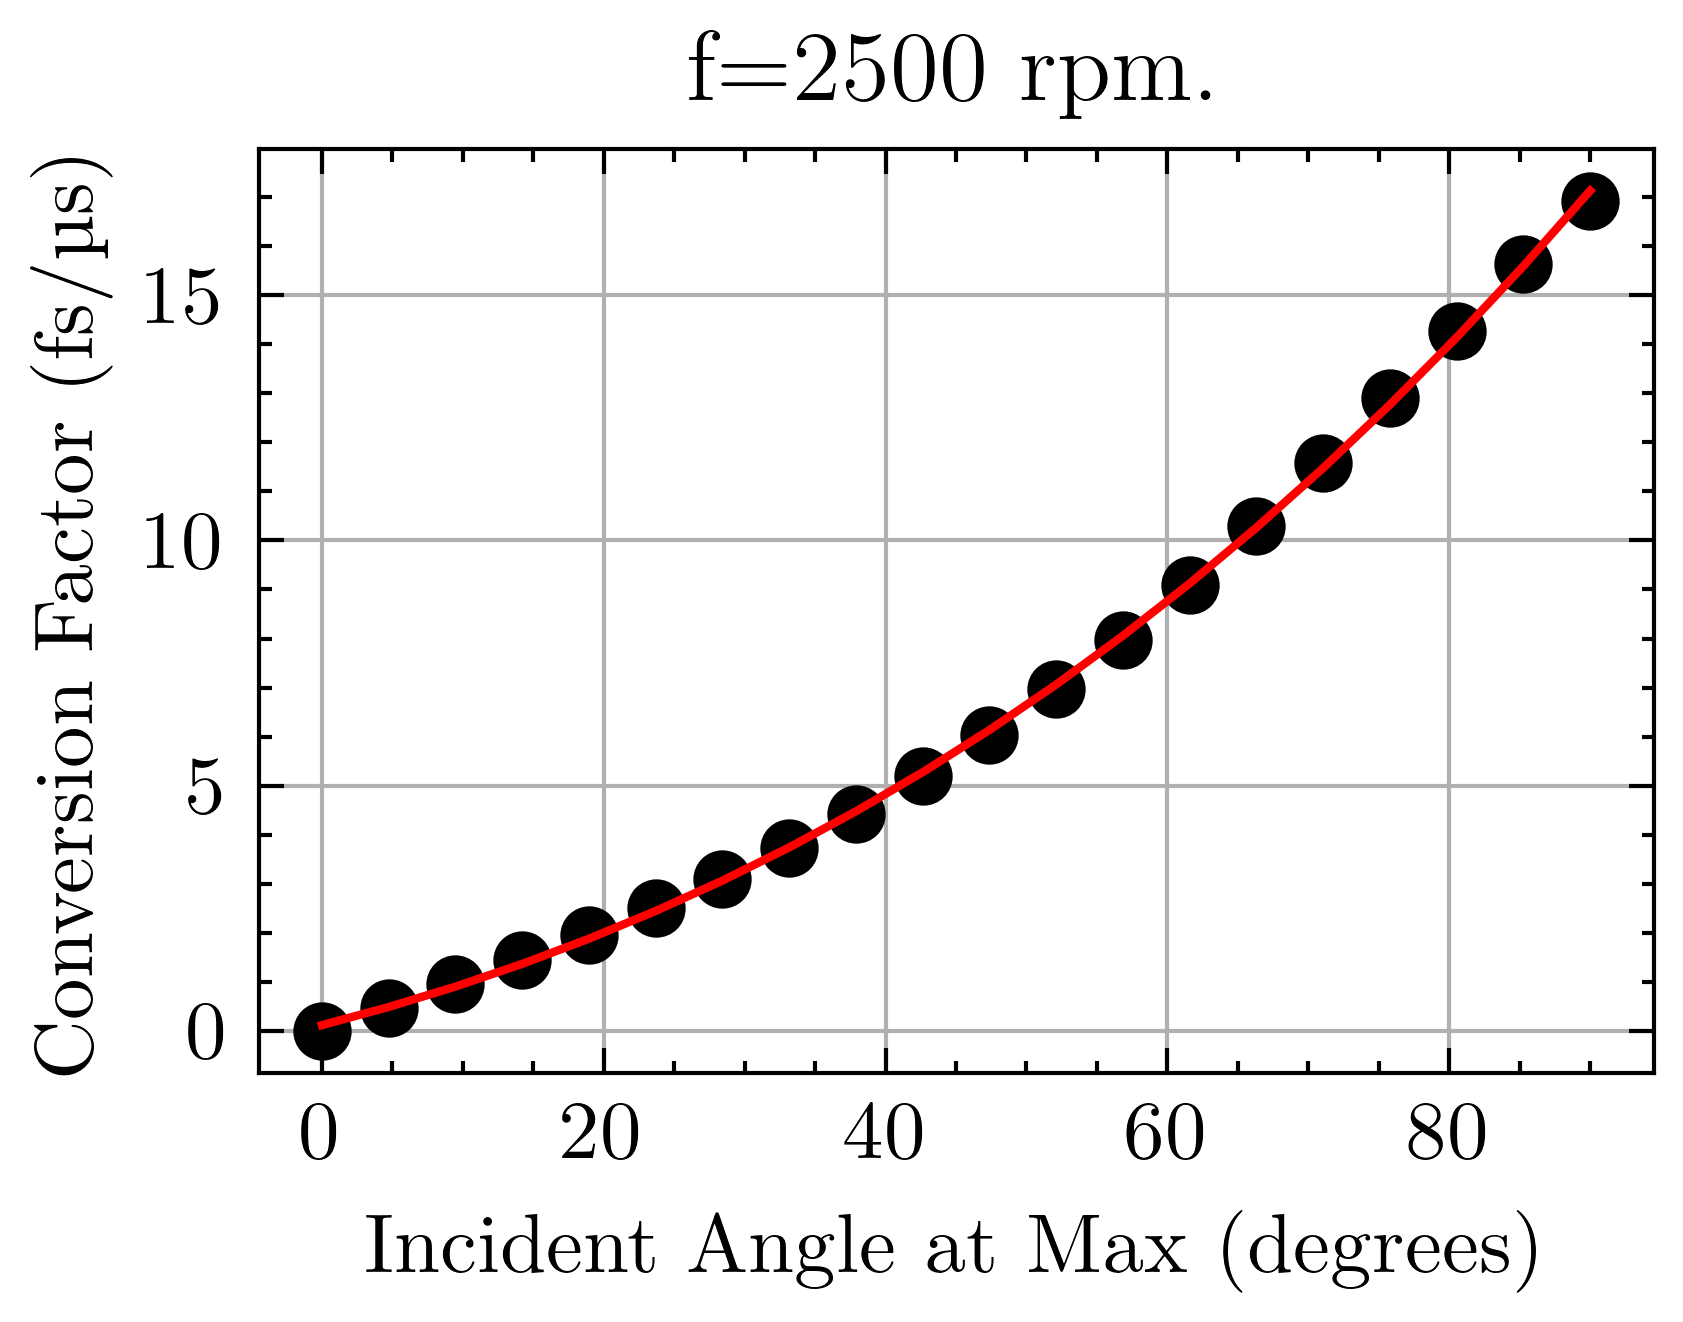

In [7]:
popt, pcov = curve_fit(polynomial_func, theta_0_arr, conv_fact_arr)
conv_fact_arr_fit = polynomial_func(theta_0_arr, *popt)

plt.figure(figsize=(3, 2), dpi=600)
plt.plot(theta_0_arr * 180 / np.pi, conv_fact_arr, 'ko')  # convert to degrees
plt.plot(theta_0_arr * 180 / np.pi, conv_fact_arr_fit, 'r-')  # fitted curve
plt.xlabel('Incident Angle at Max (degrees)')
plt.ylabel('Conversion Factor (fs/µs)')
plt.title(f'f={f*60:.0f} rpm.')
plt.grid(True)
plt.show()

In [8]:
polynomial_func(np.radians(51), *popt)

np.float64(6.838431195811655)

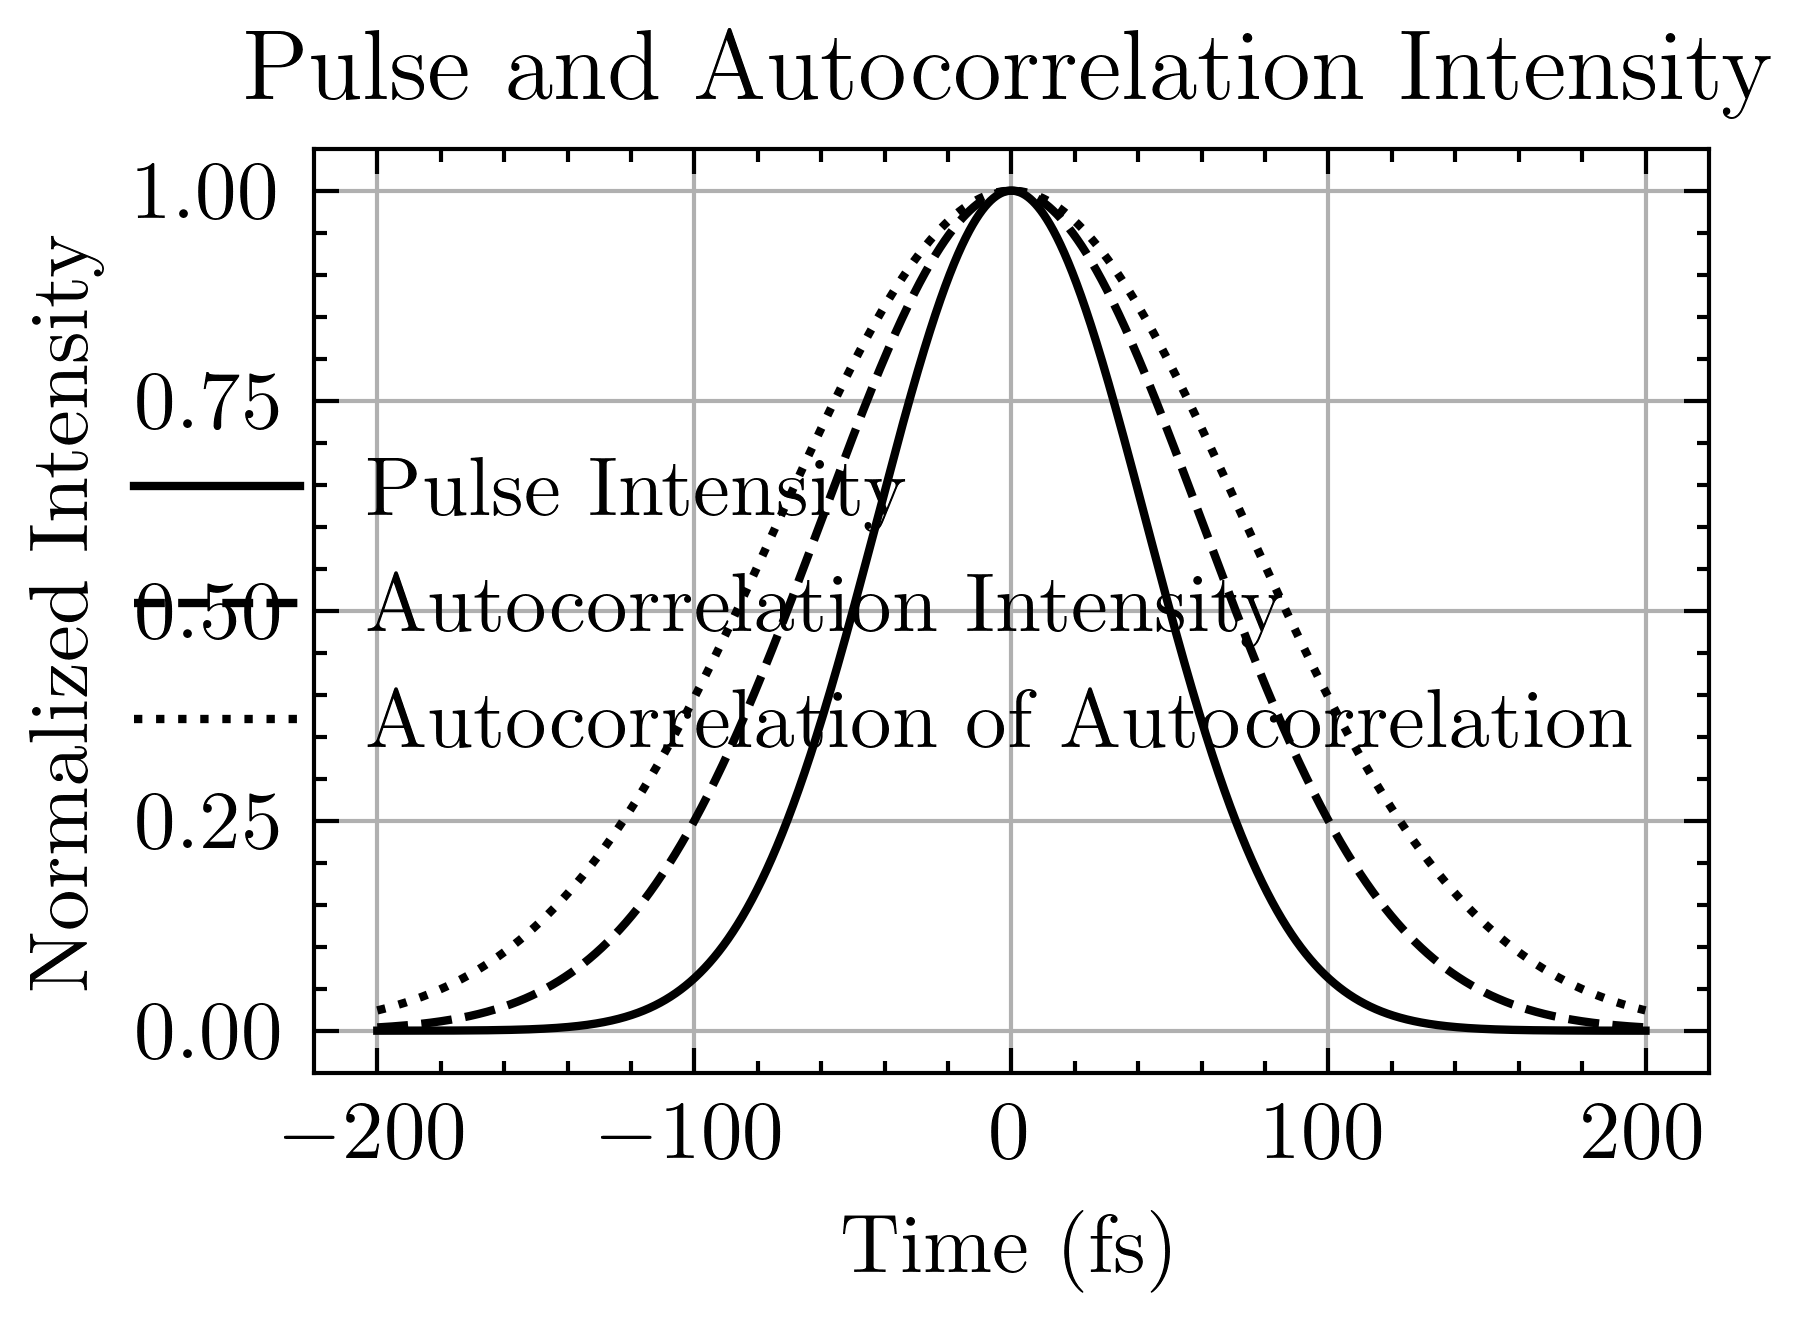

In [15]:
x = np.arange(-200, 200, 0.01)
y = np.exp(-4*np.log(2)*x**2/100**2)
y2 = np.convolve(y, y, mode='same')
y2 = y2 / np.max(y2)
y3 = np.convolve(y, y2, mode='same')
y3 = y3 / np.max(y3)

plt.figure(figsize=(3, 2), dpi=600)
plt.plot(x, y, 'k-', label = 'Pulse Intensity')
plt.plot(x, y2, 'k--', label = 'Autocorrelation Intensity')
plt.plot(x, y3, 'k:', label = 'Autocorrelation of Autocorrelation')
plt.xlabel('Time (fs)')
plt.ylabel('Normalized Intensity')
plt.title('Pulse and Autocorrelation Intensity')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
np.abs(x[y2>=0.5][0])*2/100

np.float64(1.414000000002352)

In [16]:
np.abs(x[y3>=0.5][0])*2/100

np.float64(1.731600000002063)